In [1]:
import numpy as np
import h5py
import math
import os
import pathlib
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Activation, Layer, ReLU, LeakyReLU
from tensorflow.keras import backend as K
from sklearn.metrics import roc_curve, auc
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

2022-10-15 19:21:47.917842: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-15 19:21:48.056861: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-15 19:21:48.592895: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/amdesai/HEP-Softwares/marty-public/install/lib:/home/amdesai/HEP-Softwares/ROOT/install/lib:/home/amdesai/HEP-Softwares/fastjet-install/lib:/home/amdesai/HEP-Softwares/ROOT/install/lib:/usr/local/cuda-11.7/

In [2]:
folder = "../processed-dataset/"
filename = "BKG_dataset.h5"

In [3]:
with h5py.File(folder+filename,'r') as file:
    X_train  = np.array(file['X_train'])
    X_val  = np.array(file['X_val'])    
    X_test  = np.array(file['X_test'])
X_train.shape[1]

57

In [4]:
"""
input_shape = 57
latent_dimension = 3
num_nodes=[16,8]

inputArray = keras.Input(shape=(57))
x = Dense(num_nodes[0], use_bias=False)(inputArray)
x = Activation('relu')(x)
x = Dense(latent_dimension, use_bias=False)(x)
encoder = Activation('relu')(x)

#decoder
x = Dense(num_nodes[0], use_bias=False)(encoder)
x = Activation('relu')(x)
decoder = Dense(input_shape)(x)

#create autoencoder
autoencoder = Model(inputs = inputArray, outputs=decoder)
autoencoder.summary()

tf.keras.utils.plot_model(
    autoencoder,
    to_file='result/model_arch.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=True,
    dpi=96,
    layer_range=None,
    show_layer_activations=False
)
"""

"\ninput_shape = 57\nlatent_dimension = 3\nnum_nodes=[16,8]\n\ninputArray = keras.Input(shape=(57))\nx = Dense(num_nodes[0], use_bias=False)(inputArray)\nx = Activation('relu')(x)\nx = Dense(latent_dimension, use_bias=False)(x)\nencoder = Activation('relu')(x)\n\n#decoder\nx = Dense(num_nodes[0], use_bias=False)(encoder)\nx = Activation('relu')(x)\ndecoder = Dense(input_shape)(x)\n\n#create autoencoder\nautoencoder = Model(inputs = inputArray, outputs=decoder)\nautoencoder.summary()\n\ntf.keras.utils.plot_model(\n    autoencoder,\n    to_file='result/model_arch.png',\n    show_shapes=True,\n    show_dtype=False,\n    show_layer_names=True,\n    rankdir='TB',\n    expand_nested=True,\n    dpi=96,\n    layer_range=None,\n    show_layer_activations=False\n)\n"

In [5]:
def Model():
    nodes = [20,15]
    latent_space_dim = 4
    activation="LeakyReLU"
    
    model = keras.Sequential([
        #keras.Input(shape=(57,)),
        keras.layers.Dense(nodes[0],use_bias=False,activation=activation,name='Dense_11'),
        keras.layers.Dense(nodes[1],use_bias=False,activation=activation,name='Dense_12'),
        keras.layers.Dense(latent_space_dim,use_bias=False,activation=activation,name='LatentSpace'),
        keras.layers.Dense(nodes[1],use_bias=False,activation=activation,name='Dense_21'),
        keras.layers.Dense(nodes[0],use_bias=False,activation=activation,name='Dense_22'),
        keras.layers.Dense(X_train.shape[1],use_bias=False),
    ])
    model.compile(optimizer = keras.optimizers.Adam(),metrics=['accuracy','AUC'], loss='mse')
    input_shape = X_train.shape  
    model.build(input_shape) 
    model.summary()
    return model

In [6]:
EPOCHS = 10
BATCH_SIZE = 1024
autoencoder = Model()#inputs = inputArray, outputs=decoder

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_12 (Dense)            (8609225, 16)             912       
                                                                 
 LatentSpace (Dense)         (8609225, 4)              64        
                                                                 
 Dense_21 (Dense)            (8609225, 16)             64        
                                                                 
 dense (Dense)               (8609225, 57)             912       
                                                                 
Total params: 1,952
Trainable params: 1,952
Non-trainable params: 0
_________________________________________________________________


2022-10-15 19:21:53.137311: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-10-15 19:21:53.137338: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: amdesai
2022-10-15 19:21:53.137343: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: amdesai
2022-10-15 19:21:53.137416: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 515.65.1
2022-10-15 19:21:53.137430: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 515.65.1
2022-10-15 19:21:53.137434: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 515.65.1
2022-10-15 19:21:53.137930: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in pe

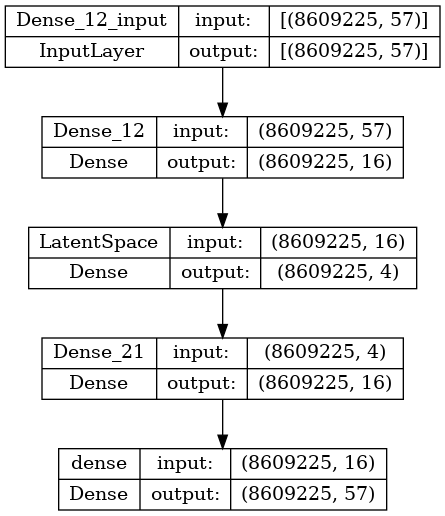

In [7]:
tf.keras.utils.plot_model(
    autoencoder,
    to_file='result/model_arch.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=True,
    dpi=96,
    layer_range=None,
    show_layer_activations=False
)

In [10]:
callbacks = tf.keras.callbacks.EarlyStopping(
    monitor="loss",
    min_delta=0.002,
    patience=5,
    verbose=1,
    mode="min",
    baseline=None,
    restore_best_weights=True,
)

In [ ]:
history = autoencoder.fit(X_train, X_train, epochs = EPOCHS, batch_size = 1024,
                  validation_data=(X_val, X_val),callbacks=callbacks)

2022-10-15 19:25:49.361529: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1962903300 exceeds 10% of free system memory.


In [ ]:
plt.plot(autoencoder.history.history["loss"], label="Training loss")
plt.plot(autoencoder.history.history["val_loss"], label="Validation loss")
plt.legend()
plt.savefig('result/loss.png')

In [ ]:
plt.plot(autoencoder.history.history["accuracy"], label="Training accuracy")
plt.plot(autoencoder.history.history["val_accuracy"], label="Validation accuracy")
plt.legend()
plt.savefig('result/accuracy.png')

In [ ]:
def save_model(model_save_name, model):
    with open(model_save_name + '.json', 'w') as json_file:
        json_file.write(model.to_json())
    model.save_weights(model_save_name + '.h5')

In [ ]:
def load_model(model_name, custom_objects=None):
    name = model_name + '.json'
    json_file = open(name, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    model = model_from_json(loaded_model_json, custom_objects=custom_objects)
    model.load_weights(model_name + '.h5')
    return model

In [ ]:
model_name = 'model_ae_aman'
model_directory = 'result/'
save_model(model_directory+model_name, autoencoder)

In [ ]:
bkg_prediction = autoencoder.predict(X_test)

In [ ]:
signal_labels = ["Ato4l", "hChToTauNu", "hToTauTau", "leptoquark"]

# add correct path to signal files
signals_file = [
    "Ato4l_lepFilter_13TeV_dataset.h5",
    "hChToTauNu_13TeV_PU20_dataset.h5",
    "hToTauTau_13TeV_PU20_dataset.h5",
    "leptoquark_LOWMASS_lepFilter_13TeV_dataset.h5",
]

In [ ]:
signal_data = []
for i, label in enumerate(signal_labels):
    with h5py.File(folder+signals_file[i], 'r') as file:
        test_data = np.array(file['Data'])
    signal_data.append(test_data)

In [ ]:
signal_results = []

for i, label in enumerate(signal_labels):
    signal_prediction = autoencoder.predict(signal_data[i])
    signal_results.append([label, signal_data[i], signal_prediction]) # save [label, true, prediction] for signal

In [ ]:
def mse_loss(true, prediction):
    # loss = tf.reduce_mean(tf.math.abs(1-tf.math.log(true - prediction)), axis=-1)
    loss = tf.reduce_mean(tf.math.square(true - prediction), axis=-1)
    # loss = - tf.reduce_mean(tf.math.log(1-(tf.math.square(true - prediction))),axis=-1)
    return loss

In [ ]:
# compute loss value (true, predicted)
total_loss = []
total_loss.append(mse_loss(X_test, bkg_prediction.astype(np.float32)).numpy())
for i, signal_X in enumerate(signal_data):
    total_loss.append(mse_loss(signal_X, signal_results[i][2].astype(np.float32)).numpy())

In [ ]:
bin_size=100

plt.figure(figsize=(10,8))
for i, label in enumerate(signal_labels):
    plt.hist(total_loss[i], bins=bin_size, label=label, density = True, histtype='step', fill=False, linewidth=1.5)
plt.yscale('log')
plt.xlabel("Autoencoder Loss")
plt.ylabel("Probability (a.u.)")
plt.title('MSE loss')
plt.legend(loc='best')
plt.savefig('result/mse_loss.png')

In [ ]:
labels = np.concatenate([['Background'], np.array(signal_labels)])

In [ ]:
target_background = np.zeros(total_loss[0].shape[0])

plt.figure(figsize=(10,8))
for i, label in enumerate(labels):
    if i == 0: continue # background events
    
    trueVal = np.concatenate((np.ones(total_loss[i].shape[0]), target_background)) # anomaly=1, bkg=0
    predVal_loss = np.concatenate((total_loss[i], total_loss[0]))

    fpr_loss, tpr_loss, threshold_loss = roc_curve(trueVal, predVal_loss)

    auc_loss = auc(fpr_loss, tpr_loss)
    
    plt.plot(fpr_loss, tpr_loss, "-", label='%s (auc = %.1f%%)'%(label,auc_loss*100.), linewidth=1.5)
    
    plt.semilogx()
    plt.semilogy()
    plt.ylabel("True Positive Rate")
    plt.xlabel("False Positive Rate")
    plt.legend(loc='center right')
    plt.grid(True)
    plt.tight_layout()
plt.plot(np.linspace(0, 1),np.linspace(0, 1), '--', color='0.75')
plt.axvline(0.00001, color='red', linestyle='dashed', linewidth=1) # threshold value for measuring anomaly detection efficiency
plt.title("ROC AE")
plt.savefig('result/roc.png')